In [ ]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X, y = make_moons(n_samples=1000,
                  noise=0.1,
                  random_state=42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                        y,
                        test_size=0.2,
                        random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

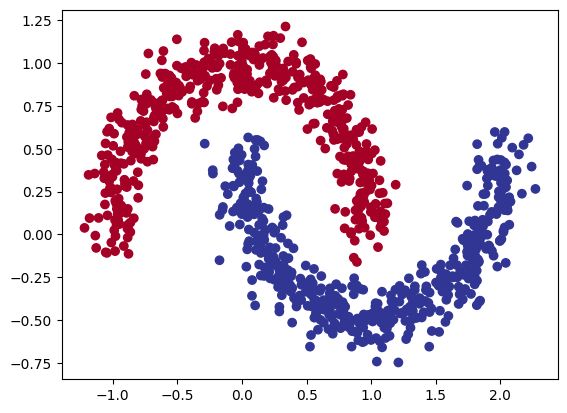

In [ ]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
class FirstModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, X):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model_1 = FirstModel()

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def tanh(z):
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [ ]:
epochs = 1000

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Accuracy: {acc}% Loss: {loss:.4f} | Test accuracy: {test_acc}% Test loss: {test_loss:.4f}")


Epoch: 0 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 100 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 200 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 300 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 400 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 500 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 600 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 700 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 800 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001
Epoch: 900 | Accuracy: 100.0% Loss: 0.0004 | Test accuracy: 100.0% Test loss: 0.0001


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


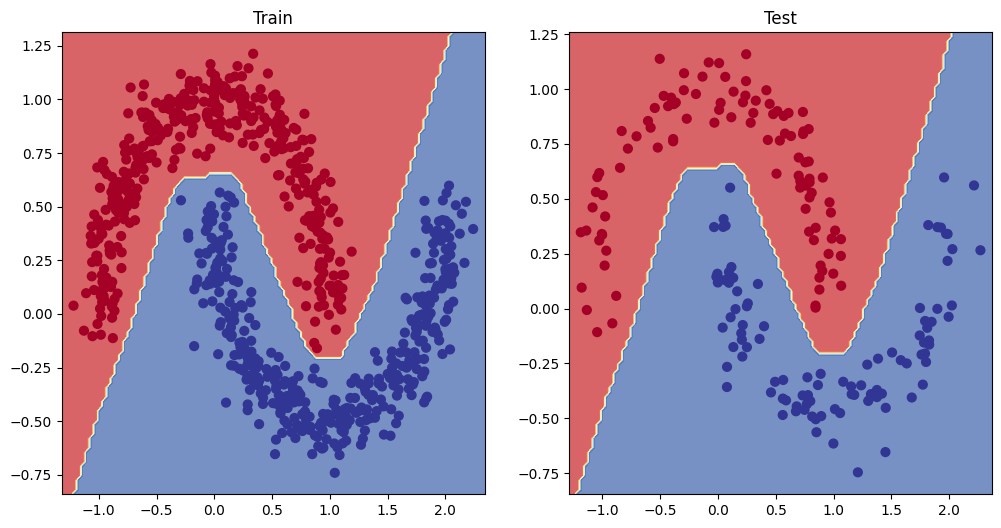

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)